In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(15.0, 11.0))

In [2]:
path = '/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab6/lab6_data'

bias_start = []
bias = []

for i in range(92,102):
    bias_start.append(fits.getdata(path+'/Bias/nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))


bias_array = np.asarray(bias_start).mean(axis=0).astype(int)
bias = bias_array.tolist()
    
avg_bias = np.asarray(bias).mean(axis=0)

In [3]:
lamp_He_start = []
lamp_He = []

for i in range(115,118):
    zeros = (8-len(str(i)))*"0"
    lamp_He_start.append(fits.getdata(path+'/Helium/nov_7'+zeros+str(i)+'HE'+str(i-114)+'.fit'.format(i),
                                   ext=0).astype(np.int))

lamp_He_array = np.asarray(lamp_He_start).mean(axis=0).astype(int)
lamp_He = lamp_He_array.tolist()
 



In [4]:
lamp_Ne_start = []
lamp_Ne = []

for i in range(118,121):
    zeros = (8-len(str(i)))*'0'
    lamp_Ne_start.append(fits.getdata(path+'/Neon/nov_7'+zeros+str(i)+'NE'+str(i-117)+'.fit'.format(i),
                                   ext=0).astype(np.int))
    
lamp_Ne_array = np.asarray(lamp_Ne_start).mean(axis=0).astype(int)
lamp_Ne = lamp_Ne_array.tolist()





In [5]:
lights_3s = []
lights_3s_start = []

for i in range(108,111):
    zeros = (8-len(str(i)))*'0'
    lights_3s_start.append(fits.getdata(path+'/Lights/nov_7'+zeros+str(i)+'-3s-'+str(i-107)+'.fit'.format(i),
                                   ext=0).astype(np.int))

lights_3s_array = np.asarray(lights_3s_start).mean(axis=0).astype(int)
lights_3s = lights_3s_array.tolist()

In [6]:
lights_60s = []
lights_60s_start = []

for i in range(111,114):
    zeros = (8-len(str(i)))*'0'
    lights_60s_start.append(fits.getdata(path+'/Lights/nov_7'+zeros+str(i)+'-60s-'+str(i-110)+'.fit'.format(i),
                                   ext=0).astype(np.int))
    
lights_60s_array = np.asarray(lights_60s_start).mean(axis=0).astype(int)
lights_60s = lights_60s_array.tolist()

In [7]:
sun = []
sun_start = []

for i in range(121,124):
    zeros = (8-len(str(i)))*'0'
    sun_start.append(fits.getdata(path+'/Sun/nov_7'+zeros+str(i)+'SUN'+str(i-120)+'.fit'.format(i),
                                   ext=0).astype(np.int))
    
sun_array = np.asarray(sun_start).mean(axis=0).astype(int)
sun = sun_array.tolist()


In [8]:
lamp_He_nobias = [lamp - avg_bias for lamp in lamp_He]

In [9]:
lamp_Ne_nobias = [lamp - avg_bias for lamp in lamp_Ne]

In [10]:
sun_nobias = [sun - avg_bias for sun in sun]

In [11]:
lights_60s_nobias = [lights - avg_bias for lights in lights_60s]

In [12]:
lights_3s_nobias = [lights - avg_bias for lights in lights_3s]

In [13]:
avg_lights_3s = np.asarray(lights_3s_nobias).mean(axis=0)

avg_lights_60s = np.asarray(lights_60s_nobias).mean(axis=0)


In [14]:
lamp_Ne_corrected = [lamp_Ne - avg_lights_60s for lamp_Ne in lamp_Ne_nobias]

In [15]:
lamp_He_corrected = [lamp_He - avg_lights_60s for lamp_He in lamp_He_nobias]

In [16]:
sun_corrected  = [sun - avg_lights_3s for sun in sun_nobias]

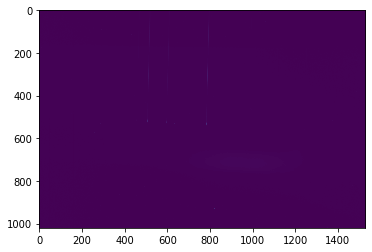

In [17]:
plt.imshow(lamp_He_corrected)
plt.show()

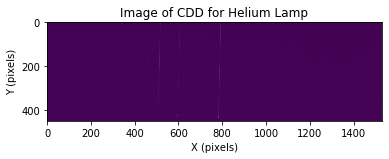

In [18]:
plt.imshow(lamp_He_corrected[100:550][:])
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.title('Image of CDD for Helium Lamp')
plt.show()

In [19]:
He_good = np.asarray(lamp_He_corrected[100:550][:]).mean(axis=0)
example_lines = [447, 540, 587.5]

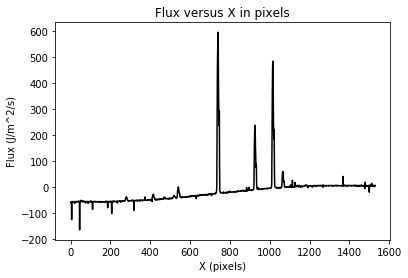

In [20]:
plot_x = np.flip(np.arange(len(He_good)),0)
plt.plot(plot_x, He_good, 'k-') #np.flip(~~~) reverses the array inside it.
plt.xlabel('X (pixels)')
plt.ylabel('Flux (J/m^2/s)')
plt.title('Flux versus X in pixels')
plt.show()

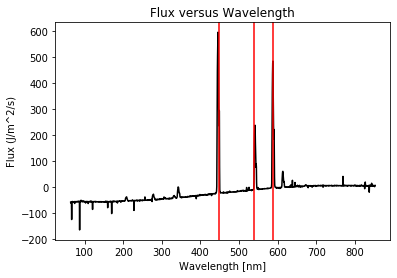

In [21]:
stretch = 1.94
shift = -64
plot_x = np.flip(np.arange(len(He_good)),0)/stretch - shift
plt.plot(plot_x, He_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (J/m^2/s)')
plt.title('Flux versus Wavelength')
plt.show()

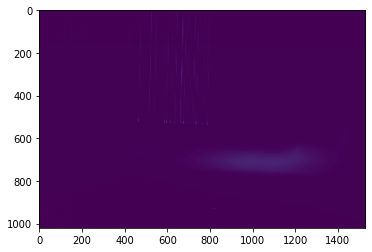

In [22]:
plt.imshow(lamp_Ne_corrected)
plt.show()

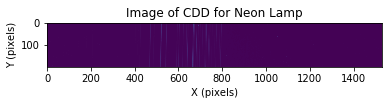

In [23]:
plt.imshow(lamp_Ne_corrected[200:400][:])
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.title('Image of CDD for Neon Lamp')
plt.show()

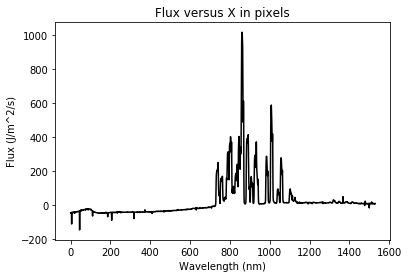

In [24]:
Ne_good = np.asarray(lamp_Ne_corrected[100:550][:]).mean(axis=0)
#example_lines_Ne = [440.1, 618.2, 640.2, 585.2]
#example_lines_Ne = [585.2, 440.1, 618.2]
example_lines_Ne = [505 ,540, 585]


plot_x = np.flip(np.arange(len(Ne_good)),0)
plt.plot(plot_x, Ne_good, 'k-') #np.flip(~~~) reverses the array inside it.

plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (J/m^2/s)')
plt.title('Flux versus X in pixels')
plt.show()

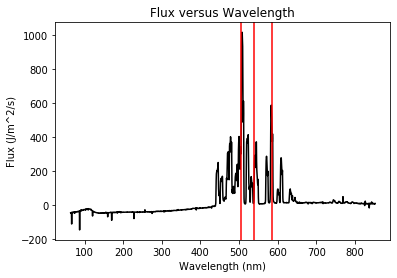

In [25]:
stretch = 1.94
shift = -64
plot_x = np.flip(np.arange(len(Ne_good)),0)/stretch - shift
plt.plot(plot_x, Ne_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines_Ne:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (J/m^2/s)')
plt.title('Flux versus Wavelength')
plt.show()

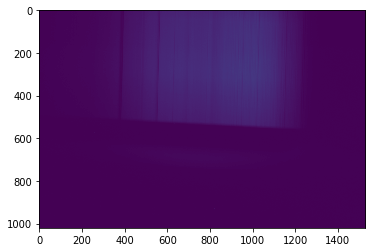

In [26]:
plt.imshow(sun_corrected)
plt.show()

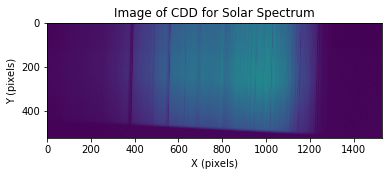

In [27]:
plt.imshow(sun_corrected[50:575][:])
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.title('Image of CDD for Solar Spectrum')
plt.show()

In [28]:
sun_good = np.asarray(sun_corrected[50:575][:]).mean(axis=0)
example_lines_sun = [430, 495, 656]

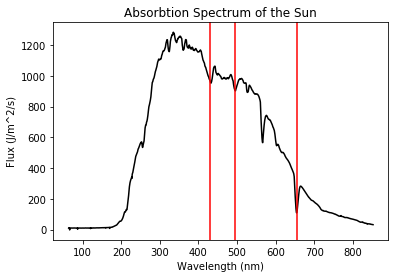

In [29]:
stretch = 1.94
shift = -64
plot_x = np.flip(np.arange(len(sun_good)),0)/stretch - shift
plt.plot(plot_x, sun_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines_sun:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength (nm)')
plt.title('Absorbtion Spectrum of the Sun')
plt.ylabel('Flux (J/m^2/s)')
plt.show()

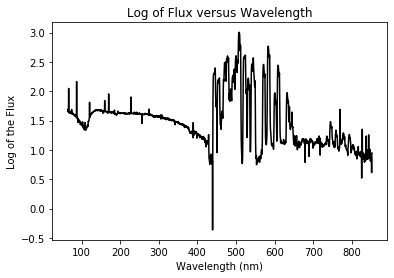

In [30]:
stretch = 1.94
shift = -64
plot_x = np.flip(np.arange(len(Ne_good)),0)/stretch - shift
plt.plot(plot_x, np.log10(np.absolute(Ne_good)), 'k-') #np.flip(~~~) reverses the array inside it.

plt.xlabel('Wavelength (nm)')
plt.ylabel('Log of the Flux')
plt.title('Log of Flux versus Wavelength')
plt.show()